## Ipython Notebooks for testing custombar

1. TickBar, VolBar, DollarBar
2. Imbalance Bar
3. Imbalance Run Bar


In [1]:
import sys
sys.path.append('E:\\git_folder\\quant_models')

In [2]:
from PyEMD import EMD

#### Data importing

In [3]:
import pandas as pd
data_fn = "././data/xu1_1min.csv"
df_price = pd.read_csv(data_fn)

In [92]:
test_df = df_price.copy()
test_df.loc[:,'datetime'] = pd.to_datetime(test_df.datetime)
test_df.set_index('datetime', inplace=True)
test_df = test_df.loc[test_df.index > pd.to_datetime("2017-01-01"),:]

In [93]:
from util.utils import sample_df

In [94]:
test_df.head()

,open,high,low,close,volume
datetime,,,,,
2017-01-03 08:59:00,9980.0,9980.0,9980.0,9980.0,91.0
2017-01-03 09:00:00,9980.0,9982.5,9972.5,9980.0,356.0
2017-01-03 09:01:00,9980.0,9997.5,9980.0,9990.0,213.0
2017-01-03 09:02:00,9990.0,9995.0,9990.0,9992.5,152.0
2017-01-03 09:03:00,9992.5,9992.5,9987.5,9987.5,145.0


In [95]:
hhdf = sample_df(test_df, '30T')

In [96]:
hhdf.head()

,open,close,low,high,volume
datetime,,,,,
2017-01-03 08:30:00,9980.0,9980.0,9980.0,9980.0,91.0
2017-01-03 09:00:00,9980.0,10000.0,9972.5,10005.0,3278.0
2017-01-03 09:30:00,9997.5,10120.0,9997.5,10132.5,47004.0
2017-01-03 10:00:00,10120.0,10145.0,10102.5,10145.0,19991.0
2017-01-03 10:30:00,10145.0,10100.0,10095.0,10145.0,12176.0


In [97]:
hhdf = hhdf[['open']]

In [98]:
hhdf.head()

,open
datetime,
2017-01-03 08:30:00,9980.0
2017-01-03 09:00:00,9980.0
2017-01-03 09:30:00,9997.5
2017-01-03 10:00:00,10120.0
2017-01-03 10:30:00,10145.0


In [99]:
emd = EMD()

In [100]:
#emd.extrema_detection = "parabol"

In [101]:
IMFs = emd.emd(hhdf.open.values)

In [102]:
IMFs.shape

(13, 31445)

In [103]:
%matplotlib inline

In [104]:
import pylab as plt

In [105]:
N = IMFs.shape[0] + 1

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  del sys.path[0]


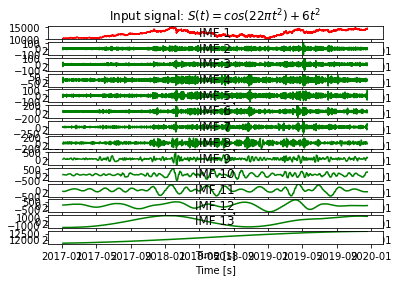

In [106]:
# Plot results
plt.subplot(N,1,1)
plt.plot(hhdf.index, hhdf.open, 'r')
plt.title("Input signal: $S(t)=cos(22\pi t^2) + 6t^2$")
plt.xlabel("Time [s]")

for n, imf in enumerate(IMFs):
    plt.subplot(N,1,n+2)
    plt.plot(hhdf.index, imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")

plt.tight_layout()
#plt.savefig('simple_example')
#plt.show()

In [107]:
round(11/4)

3

In [108]:
type(IMFs)

numpy.ndarray

In [109]:
import numpy as np
def filter_hf(imfs):
    num_component = round(imfs.shape[0]/2)
    result_df = np.sum(imfs[num_component:], axis=0)
    return result_df

In [110]:
hh = filter_hf(IMFs)

In [111]:
hh.shape

(31445,)

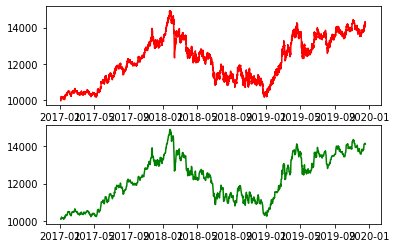

In [112]:
# Plot results
plt.subplot(2,1,1)
plt.plot(hhdf.index, hhdf.open, 'r')
plt.subplot(2,1,2)
plt.plot(hhdf.index, hh, 'g')

In [114]:
hh[:20]

array([10076.86652189, 10076.34880913, 10075.91030901, 10075.55317105,
       10075.27954476, 10075.09157964, 10074.99142521, 10074.98123099,
       10075.06314649, 10075.23932121, 10075.51190468, 10075.8830464 ,
       10076.35473399, 10076.92806048, 10077.60263018, 10078.37644484,
       10079.2471673 , 10080.21246041, 10081.26998703, 10082.41740999])